# Ejercicio 2 - Nominal Change Rate

In [1]:
import pandas as pd
import numpy as np

## Lectura de datos

In [21]:
df =  pd.read_excel("nominalmonthlycountryexchangerates_1_.xls")
df

,Nominal monthly average exchange rates (local currency per $US),Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 70,Unnamed: 71,Unnamed: 72,Unnamed: 73,Unnamed: 74,Unnamed: 75,Unnamed: 76,Unnamed: 77,Unnamed: 78,Unnamed: 79
0,Updated 4/3/2015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Source: International Financial Statistics of ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"Contact: Kari Heerman (202-694-5250, keheerman...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Note: cells in blue are analyst projections.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558,2015-08-01 00:00:00,1.272361,14.93312,7.747007,8.75,21.18575,27.4268,545.0252,1,117.5391,...,561.2221,3.873025,173.1623,582.6673,555.4402,92.14026,1718.286,35.6867,11.88591,7.261601
559,2015-09-01 00:00:00,1.262574,14.90074,7.786634,8.75,21.21709,27.53901,547.7487,1,117.8845,...,566.3796,3.914447,173.354,590.0388,556.7472,91.95687,1713.136,35.93987,11.88591,7.250985
560,2015-10-01 00:00:00,1.252786,14.86822,7.826261,8.75,21.21263,27.65169,550.4821,1,118.3448,...,568.9866,3.945514,173.5544,597.216,558.0423,91.77348,1707.996,36.20359,11.88591,7.240368
561,2015-11-01 00:00:00,1.252786,14.83578,7.85598,8.75,21.20704,27.76483,552.6869,1,118.8075,...,571.6218,3.986937,173.7547,604.416,559.3315,91.5901,1702.875,36.47786,11.83613,7.229752


## Exploración del dataset

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 562 entries, 0 to 561
Data columns (total 80 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Updated 4/3/2015  559 non-null    object
 1   Unnamed: 1        556 non-null    object
 2   Unnamed: 2        555 non-null    object
 3   Unnamed: 3        556 non-null    object
 4   Unnamed: 4        555 non-null    object
 5   Unnamed: 5        555 non-null    object
 6   Unnamed: 6        555 non-null    object
 7   Unnamed: 7        555 non-null    object
 8   Unnamed: 8        555 non-null    object
 9   Unnamed: 9        556 non-null    object
 10  Unnamed: 10       555 non-null    object
 11  Unnamed: 11       555 non-null    object
 12  Unnamed: 12       556 non-null    object
 13  Unnamed: 13       555 non-null    object
 14  Unnamed: 14       555 non-null    object
 15  Unnamed: 15       555 non-null    object
 16  Unnamed: 16       555 non-null    object
 17  Unnamed: 17     

In [4]:
df.describe()

,Updated 4/3/2015,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 70,Unnamed: 71,Unnamed: 72,Unnamed: 73,Unnamed: 74,Unnamed: 75,Unnamed: 76,Unnamed: 77,Unnamed: 78,Unnamed: 79
count,559,556.0000,555.0000,556,555.0,555,555,555.00,555,556.0000,...,555.0000,555.000000,555.0000,555.00,555.00,555.0000,555.000,555.0,555.00000,555.00000
unique,559,525.0000,446.0000,323,39.0,213,310,413.00,4,388.0000,...,546.0000,365.000000,382.0000,547.00,547.00,486.0000,461.000,300.0,491.00000,400.00000
top,2000-07-01 00:00:00,1.0728,0.0125,1,2.5,2,0,8.57,1,0.9091,...,571.6218,0.000115,21.8861,250.68,276.85,7.1429,7.143,23.8,0.86957,0.00064
freq,1,3.0000,80.0000,197,192.0,242,225,80.00,552,60.0000,...,2.0000,63.000000,32.0000,2.00,2.00,62.0000,62.000,17.0,40.00000,41.00000


In [5]:
df.head(20)

,Updated 4/3/2015,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 70,Unnamed: 71,Unnamed: 72,Unnamed: 73,Unnamed: 74,Unnamed: 75,Unnamed: 76,Unnamed: 77,Unnamed: 78,Unnamed: 79
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Source: International Financial Statistics of ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"Contact: Kari Heerman (202-694-5250, keheerman...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Note: cells in blue are analyst projections.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Region,North America,NaN,Central America,NaN,NaN,NaN,NaN,NaN,Caribbean,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Date,Canada,Mexico,Guatemala,El Salvador,Honduras,Nicaragua,Costa Rica,Panama,Jamaica,...,Cote d'Ivoire,Ghana,Nigeria,Benin,Congo,Kenya,Tanzania,Mozambique,South Africa,Zambia
7,Country code,(1220),(2010),(2050),(2110),(2150),(2190),(2230),(2250),(2410),...,(7480),(7490),(7530),(7610),(7660),(7790),(7830),(7870),(7910),(7940)
8,Month/currency,C$,Pesos,Quetzales,Colones,Lempiras,Gold cordobas,Colones,Balboas,J$,...,Francs,Cedis,Naira,Francs,Francs,Shillings,Shillings,Meticais,Rand,Kwacha
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Limpieza

In [26]:
df_paso1 = df \
        .iloc[6:10] \
        .transpose() \
        .set_axis(["Region", "Country", "CountryCode", "Currency"],
             axis = 'columns') \
        .iloc[1:] \
        .reset_index(drop=True)
df_paso1

,Region,Country,CountryCode,Currency
0,North America,Canada,(1220),C$
1,NaN,Mexico,(2010),Pesos
2,Central America,Guatemala,(2050),Quetzales
3,NaN,El Salvador,(2110),Colones
4,NaN,Honduras,(2150),Lempiras
...,...,...,...,...
74,NaN,Kenya,(7790),Shillings
75,NaN,Tanzania,(7830),Shillings
76,NaN,Mozambique,(7870),Meticais
77,NaN,South Africa,(7910),Rand


## Verificación de datos

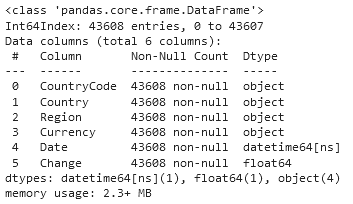

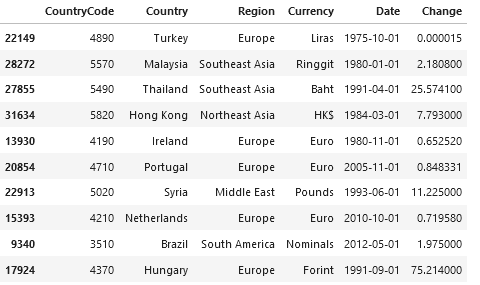

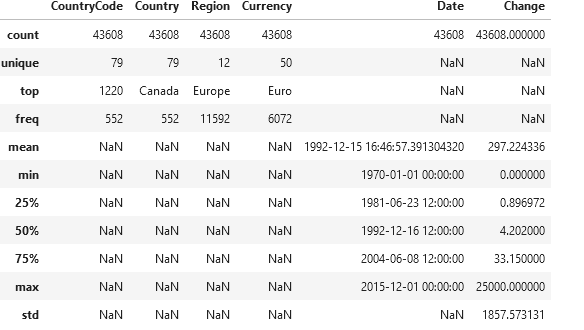

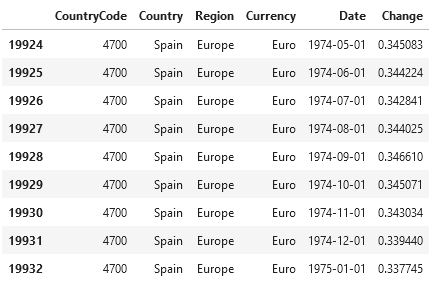

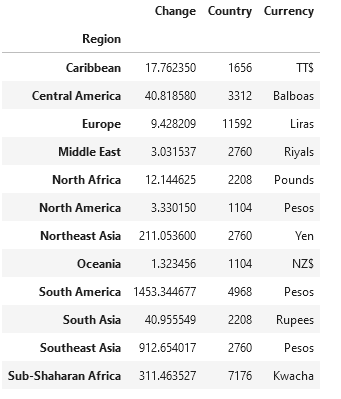